<h1 style="text-align:center; font-size: 30px;"> Procedural Generation</h1>
<br>

<p style="text-align:center; font-size: 16px;"><i>The artistry of programming lies in the fusion of creativity, problem-solving, and expression,<br>thereby providing a philosophical reflection of the human mind's capacity to create and shape the world around us.</i></p>
<br>

---

<br>
<br>
<br>

<div style="display: flex; justify-content: center;">
    <figure>
        <img src="img/v5_upscale.png" width="300">
        <figcaption>
            <p style="text-align:center; font-size: 16px;">
            <strong><a href="https://www.midjourney.com/">Midjourney</a></strong> by <i>V5_upscale</i>
        </figcaption>
    </figure>
    <div style="margin-left: 50px;">
        <figure >
            <img src="img/pg_unity.jpg" width="500">
            <figcaption>
                <p style="text-align:center; font-size: 16px;">
                <strong><a href="https://unity.com/">Unity</a> Example:</strong> <i>Procedural Generated Terrain</i>
            </figcaption>
        </figure> 
        <figure style="margin-top: 20px;">
            <img src="img/townscaper.png" width="300">
            <figcaption>
                <p style="text-align:center; font-size: 16px;">
                <strong>
                    <a href="https://oskarstalberg.com/Townscaper/">Townscaper</a> Example:
                </strong> <i>Wave Function Collapse</i>
                </p>
            </figcaption>
        </figure>
    </div>
</div>

<br>
<br>

---

There are many ways to create an artificial world. Such as writing it down on paper, drawing it or by the pure excellence of Math. Since the emergence of AI-generated art and its ascent to the highest ranks of digital representation, the masses have become aware of the importance of digital worlds in our lives.

But even before elaborately trained computer models were developed, there were artists who designed digital worlds. Larger than any human being could imagine. Therefore, I would like to take you on a journey into the world of algorithms.

---

But what is _Procedural Generation_?

Procedural generation is a technique in computer graphics and computer game development that enables the automatic creation of content using algorithms.

Unlike manual content creation by developers, procedural generation allows content to be generated in a dynamic and algorithmic way, based on rules, randomness, or other mathematical methods. This can be used, for example, to generate landscapes, buildings, weapons, characters, levels, or entire worlds.

It is used in various applications such as video games, movies, simulations, architecture, music, and art to increase efficiency and versatility in content creation, while creating a unique and ever-changing experience for the user.

The modern game designer should be familiar with 3 methods for generating procedural worlds:

- The Black Box of AI Generated Worlds <br>Demo: [Midjourney](https://www.midjourney.com/), [Nvidia Canvas](https://www.nvidia.com/en-us/studio/canvas/)

- Wave Function Collapse by Oskar Stalberg <br>Demo: [Townscaper](https://oskarstalberg.com/Townscaper/)

- Perlin Noise Composition / Fields by Ken Perlin

---

# Perlin Noise

The year is 1982 and programmer Kevin Flynn is trying to find proof that several games he developed were stolen by Ed Dillinger to secure his position as CEO of ENCOM.

The introduction to the movie Tron can be explained in a similar way. But helping in the production of the film was __Kennneth (Ken) H. Perlin__, now a professor of computer science. His algorithm _Perlin Noise_ even brought him an Oscar in 1997. He used it to develop "realistic textures" for the film Tron. 
<div style="display: flex; justify-content: center;">
    <figure style="margin-top: 30px;">
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>Tron (1982)</strong>
            </p>
        </figcaption>
        <img src="img/tron.jpg" width="600">
    </figure>
    <figure style="margin-top: 30px; margin-left: 50px;">
        <figcaption>
            <p style="text-align:center; font-size: 20px;">
                <strong>Ken Perlin</strong>
            </p>
        </figcaption>
        <img src="img/ken-perlin.jpg" width="305">
    </figure>
</div>

Steigen wir ein in Medias Res

Um zu verstehen wie wir Terrain erschaffen können probieren wir einfach ein paar Funktionen aus.

- Random PCG
- Sine / Cosine
- Random Sine
- Perlin Noise
- Perlin Noise Composition https://gamedevacademy.org/procedural-2d-maps-unity-tutorial/
https://web.archive.org/web/20170812230846/http://www.gameprogrammer.com/fractal.html
https://devforum.roblox.com/t/dungeon-generation-a-procedural-generation-guide/342413/11

Wichtig wir nutzen x & y als Map normale und z als höhenwert das ist in Game Engines anders.

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from perlin_noise import PerlinNoise
import random
from itertools import chain
import operator as op

In [114]:
def plot3D_terrain(pic, cmap='viridis'):
    '''
    Function interprets extends a xy-plain in the z-plane,
    by reinterpreting pixel values as height information.
    '''
    
    X = np.linspace(-width/2, width/2, width)
    Y = np.linspace(-height/3, height*2/3, height)
    
    X, Y = np.meshgrid(X, Y)
    Z = np.interp(np.array(pic), [-1, 0, 1], [-64, 0, 256])
    
    ax = plt.axes(projection='3d')
    ax.set_zlim(-64, 256)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cmap, edgecolor='none')
    
    
def plot2D_picture(pic, cmap='gray'):
    '''
    Just a usual image plot
    '''
    plt.imshow(pic, cmap=cmap)
    plt.show()

def plot_scatter(f, space):
    '''
    Just a scatter plot...
    '''
    plt.scatter(space, f)
    plt.show()

def plot_line_scatter(f, space):
    '''
    plots a the same function overlapping as a scatter and a line plot
    '''
    plt.scatter(space, f, color='blue')
    plt.plot(space, f, color='green')
    plt.show()

def plot_rel_sin(f, space):
    '''
    plot the input function relativ to normal sin(x)
    '''
    plt.scatter(space, f, color='blue')
    plt.plot(space, np.sin(space), color='red')
    plt.axhline(y = 0, color = 'gray', linestyle = ':')
    plt.show()

In [115]:
# Constants
width, height = 16, 16
np.random.seed(width*height) # define seed by width & height constants

In [116]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    // JS Magic bitch!
    return false;
}

<IPython.core.display.Javascript object>

## A word about Randomness



### LCG & MCG



In [117]:
def lcg(seed: int, scalar: int, modulus: int, offset: int) -> int:
    ''' 
    Linear Congruential Generators

    X(n+1) = (a X(n) + c) mod m; n >= 0

    m > 0; 
    0 <= a < m;
    c > 0; a > 0

    '''
    assert modulus > 0, "Modulus must be greater than 0"
    assert 0 <= scalar and scalar < modulus, "Scalar must be in range 0 <= a < m"

    while seed > 1:
        seed = (scalar*seed+offset) % modulus
        assert seed >= 0
        yield seed

def mcg(seed: int, scalar: int, modulus: int) -> int:
    '''
    Multiplicative Congruential Generator
    or Lehmer Generator

    Just the same as lcg with the Property c=0 & a>0
    '''
    return lcg(seed=seed, scalar=scalar, modulus=modulus, offset=0)

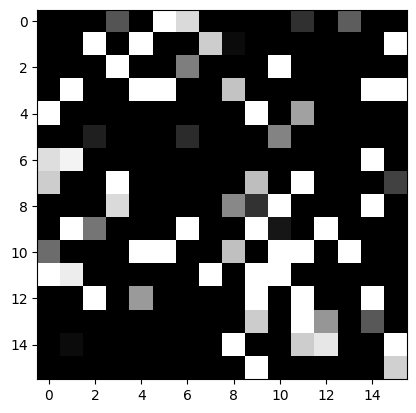

In [129]:
gen = lcg(3935559000370003845, 3203021881815356449, 2**64-1, 11742185885288659963)
pic = [[next(gen) for x in range(width)] for y in range(height)]

# Just a Linear Interpolation Trick
ncol = len(pic[0])
flattened = chain.from_iterable(pic)
max_idx, max_val = max(enumerate(flattened), key=op.itemgetter(1))
row = max_idx // ncol
col = max_idx % ncol
pic = np.interp(np.array(pic), [pic[row][0], pic[col][0]], [-64, 256])

plot2D_picture(pic)

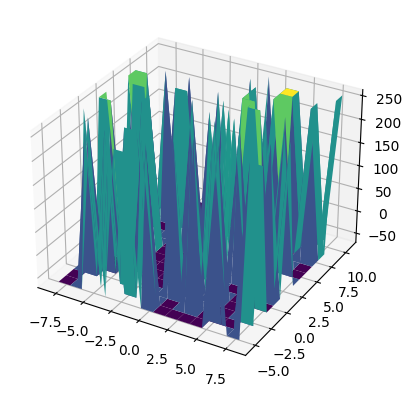

In [130]:
plot3D_terrain(pic)

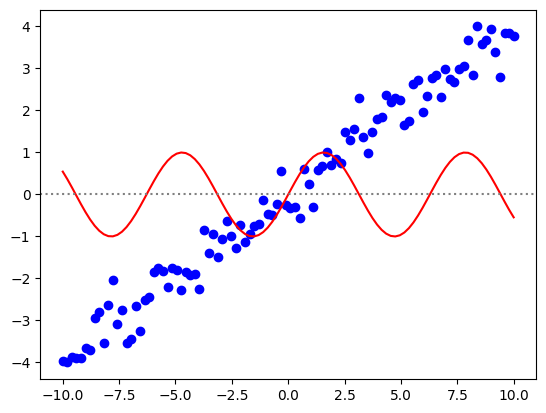

In [109]:
# Random Sine Wave Distribution
T = 10
x = np.linspace(-T, T, T**2)
f = lambda x: np.interp(np.random.normal(x), [-T, 0, T], [-1, 0, 1])

plot_rel_sin(f(x)*4, x)

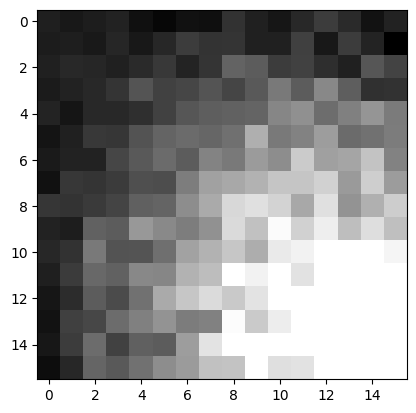

In [110]:
# Random 2D Image
pic = [[f(x)*f(y) for x in range(width)] for y in range(height)]
plot2D_picture(pic)

0.03832898086179864 -0.03573495995124043


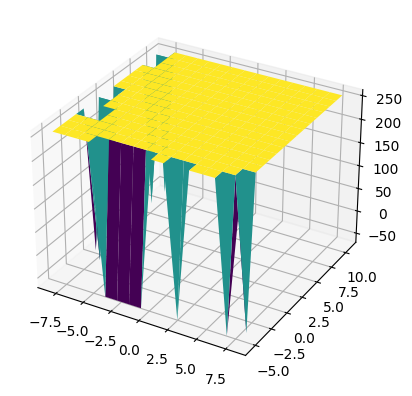

In [111]:
# Random Terrain
plot3D_terrain(pic)

In [ ]:
# Sine Wave Distribution
T = 4
x = np.linspace(T*-np.pi, T*np.pi, 210)

plot_rel_sin(np.sinc(x), x) # Welch wunder :D

In [ ]:
# Random 2D Image
pic = np.array([[np.tan(x) for x in range(width)] for y in range(height)])

plot2D_picture(pic)

In [ ]:
# Sine Terrain
plot3D_terrain(pic/4)

In [ ]:
# Perlin Noise 2D
o = 1
noise1 = PerlinNoise(octaves=2*o, seed=width*height)
noise2 = PerlinNoise(octaves=2*o, seed=width*height)
noise3 = PerlinNoise(octaves=2*o, seed=width*height)
noise4 = PerlinNoise(octaves=2*o, seed=width*height)

pic = []
for y in range(height):
    row = []
    for x in range(width):
        noise_val = noise1([x/width, y/height])
        noise_val += 0.5 * noise2([x/width, y/height])
        noise_val += 0.25 * noise3([x/width, y/height])
        noise_val += 0.125 * noise4([x/width, y/height])
        row.append(noise_val)
    pic.append(row)

pic = np.array(pic)
plot2D_picture(pic)

In [ ]:
# Perlin Noise Terrain
plot3D_terrain(pic)

<p style="text-align:center; font-size: 20px;"><i> The more beautiful the digital appearance, the more real & true are the projected alternative worlds.</i></p>